In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# 이항분포

n=5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


In [3]:
# 도장 불량이 30%일때, 무작위로 5대 차량을 선택할 경우 불량 대수가 0 ~ 5대일 확률

In [4]:
# 정규성 검증
df_2sample = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/2sample_t_test.csv")
df_2sample = df_2sample.dropna()
df_2sample
# 정규성 검증 
# 귀무가설 ~ 정규분포를 따른다
# 대립가설 ~ 정규분포를 따르지 않는다

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1
5   71.5   72.7   71.5    1
6   74.5   66.9   74.5    1
7   77.5   70.2   77.5    1
8   76.4   74.4   76.4    1
9   77.7   70.1   77.7    1

In [5]:
data_A = df_2sample['Mat_A']
stats.shapiro(data_A)
# 변수 Mat_A 의 p-value 값이 0.256이므로 정규분포를 따른다고 할 수 있다.

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

In [6]:
data_B = df_2sample['Mat_B']
stats.shapiro(data_B)
# 변수 Mat_B 의 p-value 값이 0.916이므로 정규분포를 따른다고 할 수 있다.

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

In [7]:
# 모평균 구간추정 ~ 추론통계

df_potato = pd.DataFrame({"potato" : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 
                              22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df_potato

potato
0       18
1       18
2       20
3       21
4       20
5       23
6       19
7       18
8       17
9       21
10      22
11      20
12      20
13      21
14      20
15      19
16      19
17      18
18      17
19      19

In [8]:
lower,upper = stats.norm.interval(0.95, 
                                 loc= np.mean(df_potato), 
                                 scale= 3.8/np.sqrt(20))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([17.83],[21.17])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
# 17.83 <= 모평균 <= 21.17 에 포함될 활률이 95%

In [10]:
# 모평균(mu) 신뢰구간 추정 - 모표준편차(sigma)를 모르는 경우 ~ 추론통계

df_ss = pd.DataFrame({'sample' : [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 
                                 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df_ss.describe()
# 표본평균 71.5 / 표본표준편차 1.933 (단위 : kg/mm^2)

sample
count  20.000000
mean   71.500000
std     1.933091
min    68.000000
25%    70.000000
50%    71.500000
75%    73.000000
max    75.000000

In [11]:
lower,upper = stats.t.interval(0.95, len(df_ss)-1,
                               loc = np.mean(df_ss), 
                               scale= stats.sem(df_ss))
print("신뢰구간:({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간:([70.6],[72.4])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [12]:
# 70.6 <= 모평균 <= 72.4 에 포함될 활률이 95%

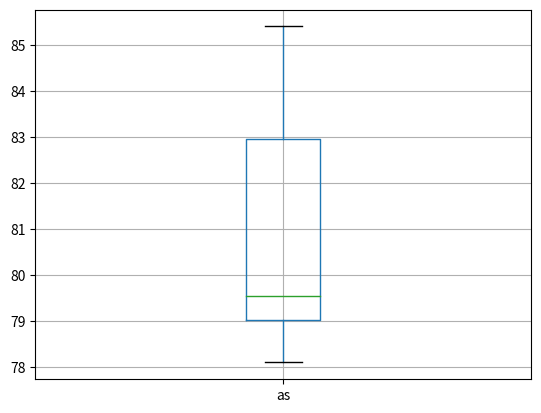

In [13]:
# 1-sample t-test ~ 추론통계
df_as = pd.DataFrame({'as' : [85.0, 79.0, 79.1, 79.9, 81.6, 
                              78.6, 85.4, 83.4, 78.1, 79.2]})
df_as.boxplot(['as'])
plt.show()
# 귀무가설 ~ 고객서비스센터의 고객만족도는 78이다
# 대립가설 ~ 고객서비스센터의 고객만족도는 78이 아니다
# 유의수준 0.05

In [14]:
df_as.describe()
# 정규성 검증
# 귀무가설 ~ 정규분포를 따른다
# 대립가설 ~ 정규분포를 따르지 않는다

as
count  10.000000
mean   80.930000
std     2.741877
min    78.100000
25%    79.025000
50%    79.550000
75%    82.950000
max    85.400000

In [15]:
statistic, p = stats.shapiro(df_as['as'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8473217487335205, p-value=0.0539751797914505


In [16]:
t_result = stats.ttest_1samp(df_as, 78)

t,p = t_result.statistic.round(3), \
t_result.pvalue.round(3)

print("1-Sample t-test")
print("t통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t통계량 : [3.379]
p-value : [0.008]


In [17]:
#  p-value = 0.008 이므로 귀무가설 기각 (대립가설  채택)~
#  고객서비스 센터의 서비스는 78이 아니다.

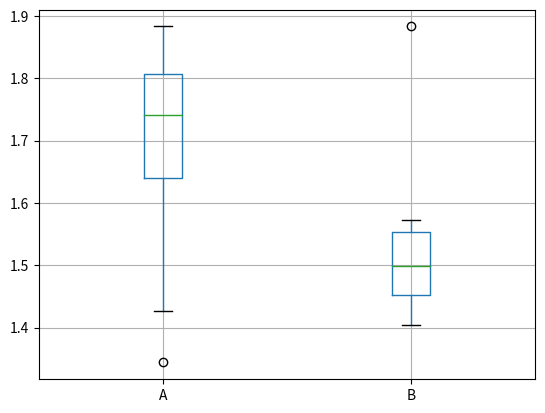

In [18]:
# 2-sample t-test ~ 추론통계

df_thick = pd.DataFrame({'A':[1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344 ],
                  'B':[1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883 ]})

df_thick.boxplot(['A','B'])
plt.show()
# 귀무가설 ~ A,B 데이터간 모평균에 차이가 없다
# 대립가설 ~ A,B 데이터간 모평균에 차이가 있다

In [19]:
df_thick.describe()
# 정규성 검정
# 귀무가설 ~ 각 표본의 모집단은 정규분포를 따른다
#  대립가설 ~ 각 표본의 모집단은 정규분포를 따르지 않는다.

A         B
count  8.000000  8.000000
mean   1.684875  1.537000
std    0.194613  0.150633
min    1.344000  1.404000
25%    1.640000  1.451500
50%    1.741500  1.498500
75%    1.807250  1.554000
max    1.883000  1.883000

In [20]:
statistic, p = stats.shapiro(df_thick['A'])
print("statistic={}, p-value={}".format(statistic, p))
# A는 p-value 0.08로 귀무가설 채택 ~ 정규분포를 따른다

statistic=0.8425754904747009, p-value=0.08004532009363174


In [21]:
statistic, p = stats.shapiro(df_thick['B'])
print("statistic={}, p-value={}".format(statistic, p))
# B는 p-value 0.014로 귀무가설 기각 ~ 정규분포를 따르지 않는다.

statistic=0.7734811902046204, p-value=0.014793740585446358


In [22]:
stats.bartlett(df_thick['A'], df_thick['B'])
# p-value 값이 0.05보다 크므로 등분산성을 가진다고 할 수 있어 2-sample t-test를 진행했음

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

In [23]:
t_result = stats.ttest_ind(df_thick['A'], df_thick['B'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [24]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.7
p:0.111


In [25]:
#  p-value 값이 0.111 로
#  유의수준 5%에서 두 공급자간 두께의 차이가 있다고 할 수 있다.

In [26]:
#  paired t-test ~ 추론 통계

df_before = pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df_after = pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df_before, df_after)

t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

# 귀무가설 ~ 회사원들의 성적은 학원가기 전후에 대한 차이가 없다
# 대립가설 ~ 회사원들의 성적은 학원가기 전후에 대한 차이가 있다.
# 유의수준 0.05

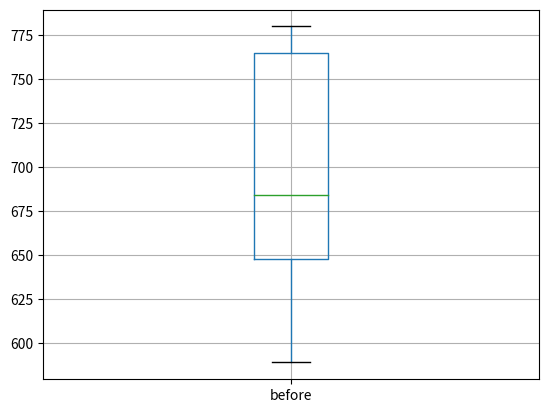

In [27]:
df_before.boxplot()
plt.show()

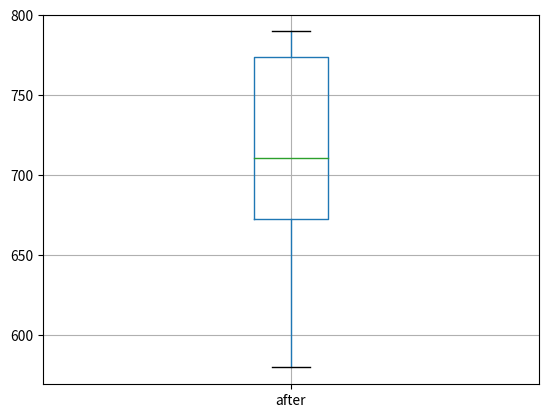

In [28]:
df_after.boxplot()
plt.show()

In [29]:
# 정규성 검증
#  귀무가설 ~ 정규분포를 따른다
#  대립가설 ~ 정규분포를 따르지 않는다.

print("Paried t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 유의수준 0.05에서 p-value값이 0.05이므로 학원 수업 전후에 점수 차이가 있다고 판단 할 수 있다.
#  t값이 음수이므로 학원 수업 후의 성적이 더 크다고 할 수 있다.

Paried t-test
t:[-2.266]
p:[0.05]


In [30]:

# 1 proportion test

count_front =40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count_front, n_obs, value)

print( "1 Proportion test")
print( 'z : {0:0.3f}'.format(stat))
print( 'p : {0:0.3f}'.format(pval))

#  모집단 비율 0.5
# 귀무가설 ~ 모집단 비율이 귀무가설의 비율과 같다
# 대립가설 ~ 모집단 비율이 귀무가설의 비율과 다르다.

1 Proportion test
z : -2.041
p : 0.041


In [31]:
#  결과적으로 p-value값이 0.041로 0.05보다 작아 비율이 같다고 할 수 없다.(다르다고 할 수 있다)

In [32]:
# 2 proportion test

count = np.array([14,5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print( "2 Proportion test")
print( 'z : {0:0.3f}'.format(stat))
print( 'p : {0:0.3f}'.format(pval))

#  유의수준 0.05
# 귀무가설 ~ 두 공장의 불량률이 같다
# 대립가설 ~ 두 공장의 불량률이 다르다

2 Proportion test
z : 2.073
p : 0.038


In [33]:
#  p-value < 0.05이므로 두 공장의 불량률은 차이가 있다고 할 수 있다.

In [34]:
#  카이제곱 검정, chi-square test ~ 추론통계

df_image = pd.DataFrame({'A/S':[18, 8, 4, 4, 3, 3 ],
                  '가격':[1, 2, 1, 1, 1, 25],
                  '성능':[8, 14, 3, 2, 3, 8],
                  '확장성':[7, 5, 4, 3, 1, 10],
                  '디자인':[10, 5, 9, 2, 1, 2],
                  '안정성':[9, 9, 5, 7, 1, 1],
                  '기능성':[10, 4, 4, 3, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df_image)

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

# 귀무가설 ~ 각 제품에 대한 이미지 차이가 존재하지 않는다
#  대립가설 ~ 각 제품에 대한 이미지 차이가 존재한다.

chi-square test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


In [35]:
#  유의수준 5%에서 p-value값이 0이므로 제품별 이미지에 대한 차이가 있다고 할 수 있다

In [36]:
# 철강의 청정도를 높이기 위해 제강공정에서 2차 경련을 실시하는데
# 강종별과 type에 따라 2차정련 시간에 차이가 있는 결정하라(유의수준 0.05)
df_steel = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/ANOVA.csv", encoding = 'euc-kr')
df_steel.head()

time charge gangjong type
0  32.2      A        a    a
1  30.4      B        a    a
2  33.6      C        a    a
3  36.4      D        a    a
4  33.9      E        a    a

In [37]:
gangjong = df_steel.groupby('gangjong')['time'].apply(list).to_dict()
df_gangjong = pd.DataFrame(gangjong)
df_gangjong

a     b     c     d
0  32.2  33.1  32.6  26.7
1  30.4  29.9  32.7  28.5
2  33.6  31.7  29.3  30.9
3  36.4  27.5  25.9  26.2
4  33.9  34.0  31.1  32.3
5  34.9  30.7  23.8  23.7

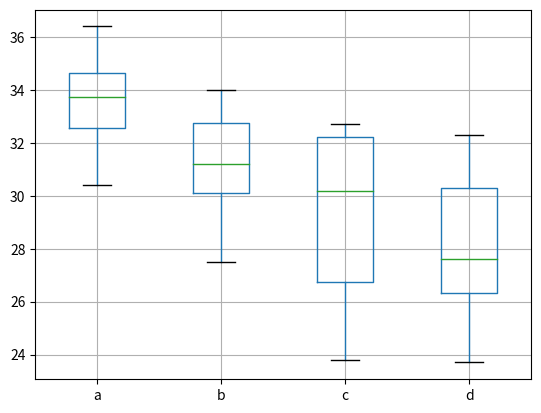

In [38]:
df_gangjong.boxplot(['a','b','c','d'])
plt.show()

In [39]:
#  귀무가설 ~ 강종별 2차 정련 시간에 차이가 없다
#  대립가설 ~ 강종별 2차 정련 시간에 차이가 있다.
f_result = stats.f_oneway(df_gangjong['a'],df_gangjong['b'],df_gangjong['c'],df_gangjong['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print("F 통계량: {}".format(f))
print("p 통계량: {}".format(p))

# p-value값이 0.019이므로 귀무가설 기각 ~ 강종별 2차 정련 시간에 차이가 있다.

One-way
F 통계량: 4.172
p 통계량: 0.019


In [40]:
type_f = df_steel.groupby('type')['time'].apply(list).to_dict()
df_type = pd.DataFrame(type_f)
df_type

a     b
0   32.2  32.6
1   30.4  32.7
2   33.6  29.3
3   36.4  25.9
4   33.9  31.1
5   34.9  23.8
6   33.1  26.7
7   29.9  28.5
8   31.7  30.9
9   27.5  26.2
10  34.0  32.3
11  30.7  23.7

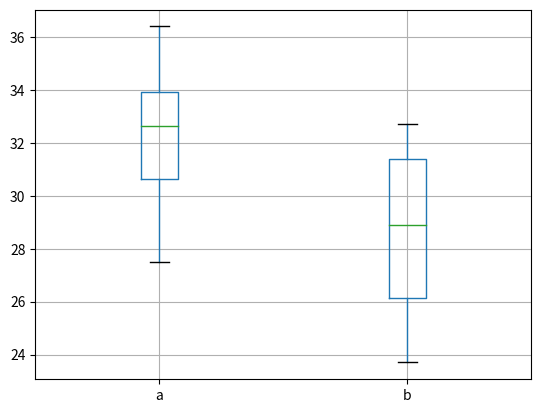

In [41]:
df_type.boxplot(['a','b'])
plt.show()

In [42]:
# 귀무가설 ~ 타입별 2차정련 시간에 차이가 없다
# 대립가설 ~  타입별 2차정련 시간에 차이가 있다.

f_result = stats.f_oneway(df_type['a'],df_type['b'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print("F 통계량: {}".format(f))
print("p 통계량: {}".format(p))

# p-value값이 0.005이므로 귀무가설 기각 ~ 타입별 2차 정련에 시간 차이가 있다.

One-way
F 통계량: 9.654
p 통계량: 0.005


In [43]:
# correlation analysis ~ 추론통계

df_strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 
               36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df_temperature = [14, 15, 14, 16 ,17, 14, 17, 16 ,15, 16,
                 14, 16, 18, 13 ,15 ,17 ,14 ,16 ,20, 21]

corr, pval = stats.pearsonr(df_strength, df_temperature)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

# 귀무가설 ~ 온도와 강직도는 상관계수가 0이다
#  대립가설 ~ 온도와 강직도는 상관계수가 0이 아니다


Correlation Analysis
corr:-0.723
p-value:0.000


In [44]:
# p-value값이 0이 므로 귀무가설 기각
#corrr값이 -0.723이므로 초코칩 강도와 재료 반죽 온도간 매우 강한(음) 상관성이 있다고 할 수 있다.